In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [14]:
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path)

print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1    

### 데이터 전처리 - 데이터 읽어오기

In [12]:
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path, usecols=['Date','Open','High','Low','Close'])

print(df)

            Date        Open        High         Low       Close
0     2018-02-05  262.000000  267.899994  250.029999  254.259995
1     2018-02-06  247.699997  266.700012  245.000000  265.720001
2     2018-02-07  266.579987  272.450012  264.329987  264.559998
3     2018-02-08  267.079987  267.619995  250.000000  250.100006
4     2018-02-09  253.850006  255.800003  236.110001  249.470001
...          ...         ...         ...         ...         ...
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013

[1009 rows x 5 columns]


### 데이터 전처리 - 2021년 이후의 종가 데이터 출력

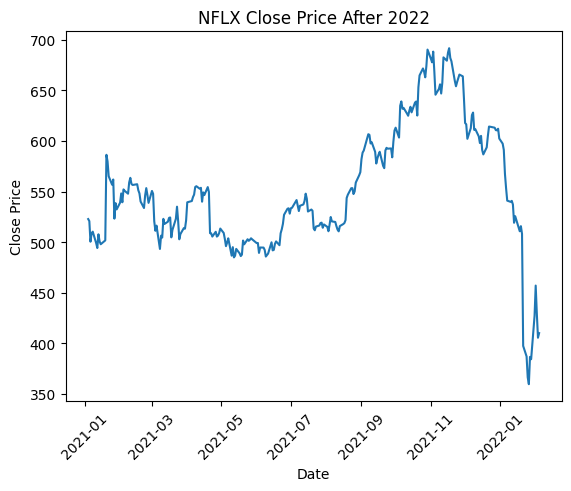

In [34]:
new_df = pd.read_csv(csv_path, usecols=range(1,7))
new_df['Date'] = pd.to_datetime(df['Date'])

# 2022년 이후 데이터 필터링
df_after_2021 = new_df[new_df['Date'] > '2021-01-01']

# 2022년 이후 데이터 시각화
plt.plot(df_after_2021['Date'], df_after_2021['Close'])
plt.title('NFLX Close Price After 2022')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Close Price')
plt.show()

### 데이터 분석 – 2021년 이후 최고, 최저 종가 출력하기

In [35]:
max_close = df_after_2021['Close'].max()
min_close = df_after_2021['Close'].min()

# 결과 출력
print(f"2021년 이후 가장 높은 종가: {max_close}")
print(f"2021년 이후 가장 낮은 종가: {min_close}")

2021년 이후 가장 높은 종가: 691.690002
2021년 이후 가장 낮은 종가: 359.700012


### 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

        Month       Close
0  2021-01-01  526.816845
1  2021-02-01  548.959999
2  2021-03-01  518.123482
3  2021-04-01  533.136662
4  2021-05-01  496.714497
5  2021-06-01  503.324091
6  2021-07-01  528.653330
7  2021-08-01  532.346817
8  2021-09-01  590.795239
9  2021-10-01  642.202849
10 2021-11-01  667.524286
11 2021-12-01  608.484089
12 2022-01-01  487.853500
13 2022-02-01  425.595009


C:\Users\User\AppData\Local\Temp\ipykernel_10824\3842216536.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['Month'] = df_after_2021['Date'].dt.to_period('M')


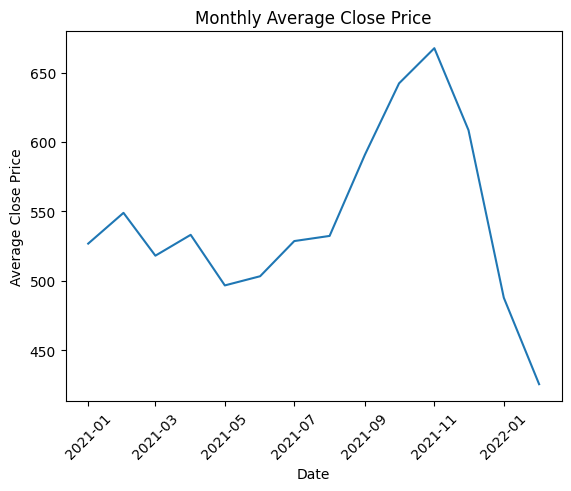

In [40]:
new_df = pd.read_csv(csv_path, usecols=range(1,7))
new_df['Date'] = pd.to_datetime(df['Date'])

# 2022년 이후 데이터 필터링
df_after_2021 = new_df[new_df['Date'] > '2021-01-01']
df_after_2021['Month'] = df_after_2021['Date'].dt.to_period('M')

#df_after_2021 이게 지금 필터링된 데이터
monthly_avg_close = df_after_2021.groupby('Month')['Close'].mean().reset_index()

# 'Month'를 datetime 형식으로 변환 (시각화를 위해)
monthly_avg_close['Month'] = monthly_avg_close['Month'].dt.to_timestamp()

# 데이터 확인
print(monthly_avg_close)

plt.plot(monthly_avg_close['Month'], monthly_avg_close['Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Average Close Price')
plt.show()

### 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기


In [ ]:
new_df = pd.read_csv(csv_path, usecols=range(1,7))
new_df['Date'] = pd.to_datetime(df['Date'])

# 2022년 이후 데이터 필터링
df_after_2021 = new_df[new_df['Date'] > '2021-01-01']

plt.plot(df_after_2021['Date'], df_after_2021['Low'], label = 'High)')
plt.plot(df_after_2021['Date'], df_after_2021['High'], label = 'Low')
plt.plot(df_after_2021['Date'], df_after_2021['Close'], label = 'Close')


plt.title('High, Low and Close Prices since january 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 45) #x축 45도 회전
plt.legend()
plt.show()